In [1]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get our Training and Test Data
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
# Inspect our Training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Get our training labels
labels = train['label'].values

In [5]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
a=np.unique(unique_val)# View the unique labels, 24 in total (no 9)
print(a)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


<AxesSubplot:ylabel='count'>

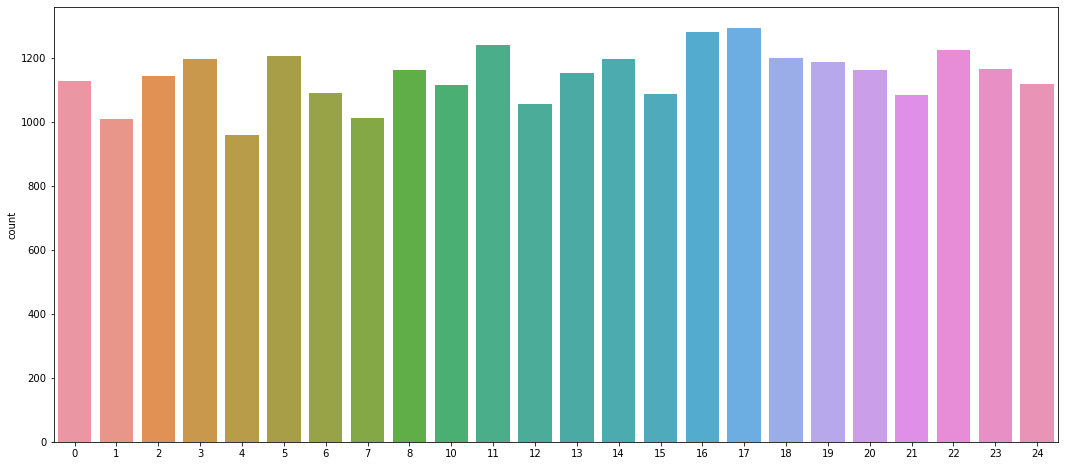

In [6]:
# Plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [7]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [8]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
# View our labels
labels
# len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [11]:
print('hoise')

hoise


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


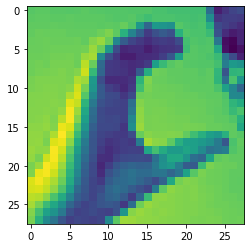

In [12]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
# Split our data into x_train, x_test, y_train and y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [14]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

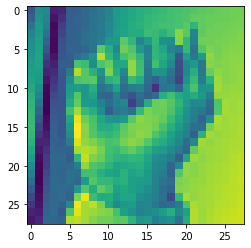

In [16]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [17]:
# Create our CNN Model

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [20]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 48s 301ms/step - loss: 2.6351 - accuracy: 0.1934 - val_loss: 1.7303 - val_accuracy: 0.4624
Epoch 2/10
151/151 [==============================] - 42s 279ms/step - loss: 1.3842 - accuracy: 0.5353 - val_loss: 0.9570 - val_accuracy: 0.7071
Epoch 3/10
151/151 [==============================] - 53s 355ms/step - loss: 0.8034 - accuracy: 0.7262 - val_loss: 0.5286 - val_accuracy: 0.8274
Epoch 4/10
151/151 [==============================] - 49s 323ms/step - loss: 0.5289 - accuracy: 0.8181 - val_loss: 0.3665 - val_accuracy: 0.8847
Epoch 5/10
151/151 [==============================] - 48s 318ms/step - loss: 0.3754 - accuracy: 0.8710 - val_loss: 0.2544 - val_accuracy: 0.9153
Epoch 6/10
151/151 [==============================] - 45s 300ms/step - loss: 0.2880 - accuracy: 0.9047 - val_loss: 0.1796 - val_accuracy: 0.9454
Epoch 7/10
151/151 [==============================] - 44s 293ms/step - loss: 0.1966 - accuracy: 0.9354 - val_loss: 0.1173 - val_ac

In [21]:
# Save our Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


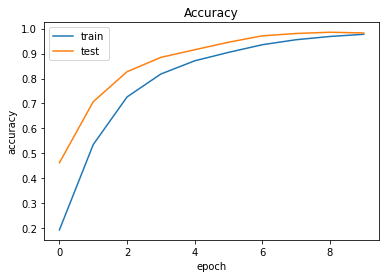

In [22]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [23]:
# Reshape our test data so that we can evaluate it's performance on unseen data

test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [24]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.6795872838817624

In [25]:
# Create function to match label to letterv
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [26]:
#real time input from webcam
import cv2
cap_from_laptop = cv2.VideoCapture(0)

while True:
    ret, frame = cap_from_laptop.read()
    frame=cv2.flip(frame, 1)
    roi = frame[100:400, 320:620] #  hoi hoi rectangular rehion of interest
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1) 
    
    predict_x=model.predict(roi)
    result=np.argmax(predict_x,axis=1)
    font=cv2.FONT_HERSHEY_COMPLEX
   
    cv2.putText(copy, getLetter(result), 
                (300 , 100), font, 2, 
                (0, 255, 0), 2)
    
      
    cv2.putText(copy, 
                'CSE428 Project  ', 
                (50, 50), 
                font, 1, 
                (0, 255, 255), 
                2)
    cv2.imshow('frame', copy)  
    if cv2.waitKey(1) == 13: # program off hoye jabe 
        break
cap_from_laptop.release()
cv2.destroyAllWindows() 

In [27]:
print("Authors: BISMOY,RIA,BIKASH,FAHIM")

Authors: BISMOY,RIA,BIKASH,FAHIM
